# Problema 23, 24 y 25
## 23)
Numéricamente, a una integral de la forma <br>
<center> $I = \int_{a}^{b} f(x) dx$ </center> <br>
La buscamos escribir de la forma aproximada
<center> $I \approx \sum_{i=1}^{N} \omega_i f(x_i)$ </center> <br>
Luego, la integración de Newton-Coates de orden $n$ implica buscar el polinomio interpolatorio de Lagrange $p(x)$ de grado $n$, utilizando los $n+1$ puntos interpolatorios $(x_i,f(x_i))$, pidiendo además que los $x_i$ estén equiespaciados una distancia $h = \frac{b-a}{n}$. <br>
Si pedimos $n=2$, necesitamos 3 puntos para formar <br>
<center> $p_3(x) = \sum_{i=1}^{3} l_{i,3} f(x_i)$ </center> <br>
<center> $l_{i,3} = \prod_{j=1}^{3} \frac{x-x_j}{x_i - x_j}$ ; $i \neq j$ </center> <br>
Luego integramos, tal que <br>
<center> $\int_{x_0}^{x_2} f(x) dx = \int_{x_0}^{x_2} p_3(x) dx$ </center> <br>

Y sabiendo que $x_2 = x_0 + 2h$, podemos simplificar para encontrar los *pesos* $\omega_{0,1,2}$ de la regla de Simpson: <br>

### <center> $\int_{x_0}^{x_0+2h} p_3(x) dx = (\frac{f(x_0)}{3}+\frac{4f(x_1)}{3}+\frac{f(x_2)}{3})\cdot h$ </center>

<center> $\omega_0 = \frac{1}{3}$; $\omega_1 = \frac{4}{3}$; $\omega_2 = \frac{1}{3}$ </center>

## 24)
Queremos calcular numéricamente el valor $I$ de la integral <br>
<center> $I = \int_{-5}^{5}\frac{dx}{1+x^2} = 2 \cdot arctg(5) \approx 2.7468$ </center> <br>

Utilizando Newton-Coates *(N-C)* de orden $n \in [1,10]$. <br>
Recordamos que el orden $n$ en N-C corresponde al grado del polinomio interpolatorio $p_n(x)$ que se usa para aproximar la función $f(x)$ a integrar en el dominio especificado, con $n+1$ puntos de interpolación $(x_i,f(x_i))$ *equiespaciados* una distancia $h=\frac{b-a}{n}$. <br>
Si bien existe una fórmula como tal para generalizar los coeficientes para orden $n$ de N-C, nos pareció muy complicada y directamente preferimos utilizar los ya tabulados. <br> <br>
**Referencias:** <br>
https://mathworld.wolfram.com/Newton-CotesFormulas.html <br>
https://www.thescipub.com/pdf/jmssp.2010.193.204.pdf <br>

### Inicio código

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(x): #La función
    y = 1/(1+x**2)
    return y

a = -5 #el Dominio
b = 5

def pts(n): #Los pts a interpolar para diferente orden
    X = np.empty(n)
    Y = np.empty(n)
    h = (b-a)/(n-1)
    
    for i in range(n):
        X[i] = a + i*h
        Y[i] = 1/(1+X[i]**2)
        
    return X,Y,h

I_T = np.empty(10) #Haremos 10 órdenes

def p(x,X,Y,N): #Para definir los polinomios interpolatorios
    
    p = 0 #variable para la sumatoria
        
    for j in range(N+1): #sumatoria desde j hasta n-1
        
        l = 1 #variable para la productoria, adentro del loop de la sumatoria
        
        for i in range(N+1): #productoria para el l(x)
            
            if i == j: #en la productoria no entra el término i = j
                continue
            else:
                l = l*((x-X[i])/(X[j]-X[i])) #tengo que definir la lista de pts X y su f(x), Y.
                
            #print(l) revisamos cada término de l
                
        p += l*Y[j] #usando lista y el polinomio l_j, voy armando el polinomio p con n pts. 
        
    return p

x = np.linspace(-5,5,1000)

In [4]:
#Orden 1: (recordemos que orden n => n+1 pts)

X,Y,h = pts(2)

I = (Y[0]+Y[1])*h/2
I_T[0] = I

print(f'El valor de la integral N-C de grado {len(X)-1} es = {I}')

p1 = p(x,X,Y,1)

#Orden 2:

X,Y,h = pts(3)

I = (Y[0]+4*Y[1]+Y[2])*h/3
I_T[1] = I

print(f'El valor de la integral N-C de grado {len(X)-1} es = {I}')

p2 = p(x,X,Y,2)

#Orden 3:

X,Y,h = pts(4)

I = (Y[0]+3*Y[1]+3*Y[2]+Y[3])*h*(3/8)
I_T[2] = I

print(f'El valor de la integral N-C de grado {len(X)-1} es = {I}')

p3 = p(x,X,Y,3)

#Orden 4:

X,Y,h = pts(5)

I = (7*Y[0]+32*Y[1]+12*Y[2]+32*Y[3]+7*Y[4])*h*(2/45)
I_T[3] = I

print(f'El valor de la integral N-C de grado {len(X)-1} es = {I}')

p4 = p(x,X,Y,4)

#Orden 5:

X,Y,h = pts(6)

I = (19*(Y[0]+Y[-1])+75*(Y[1]+Y[-2])+50*(Y[2]+Y[3]))*h*(5/288)
I_T[4] = I

print(f'El valor de la integral N-C de grado {len(X)-1} es = {I}')

p5 = p(x,X,Y,5)

#Orden 6:

A_6 = 1 #numerador
B_6 = 140 #denominador
c_6 = 41,216,27,272,27,216,41 #coeficientes (en orden, acompañan a Y[i])

X,Y,h = pts(7)
I = 0

for i in range(len(X)):
    I += (c_6[i]*Y[i])*A_6/B_6
    
I_T[5] = I

print(f'El valor de la integral N-C de grado {len(X)-1} es = {I}')

p6 = p(x,X,Y,6)

#Orden 7:

A_7 = 7
B_7 = 17280
c_7 = 751,3577,1323,2989,2989,1323,3577,751

X,Y,h = pts(8)
I = 0

for i in range(len(X)):
    I += (c_7[i]*Y[i])*A_7/B_7
    
I_T[6] = I

print(f'El valor de la integral N-C de grado {len(X)-1} es = {I}')

p7 = p(x,X,Y,7)

#Orden 8:

A_8 = 4
B_8 = 14175
c_8 = 989,5888,-928,10496,-4540,10496,-928,5888,989

X,Y,h = pts(9)
I = 0

for i in range(len(X)):
    I += (c_8[i]*Y[i])*A_8/B_8
    
I_T[7] = I

print(f'El valor de la integral N-C de grado {len(X)-1} es = {I}')

p8 = p(x,X,Y,8)

#Orden 9:

A_9 = 9
B_9 = 89600
c_9 = 2857,15741,1080,19344,5778,5778,19344,1080,15741,2857

X,Y,h = pts(10)
I = 0

for i in range(len(X)):
    I += (c_9[i]*Y[i])*A_9/B_9
    
I_T[8] = I

print(f'El valor de la integral N-C de grado {len(X)-1} es = {I}')

p9 = p(x,X,Y,9)

#Orden 10: (último, porque es un bardo)

A_10 = 5
B_10 = 299376
c_10 = 16067,106300,-48525,272400,-260550,427368,-260550,272400,-48525,106300,16067

X,Y,h = pts(11)
I = 0

for i in range(len(X)):
    I += (c_10[i]*Y[i])*A_10/B_10
    
I_T[9] = I

print(f'El valor de la integral N-C de grado {len(X)-1} es = {I}')

p10 = p(x,X,Y,10)

El valor de la integral N-C de grado 1 es = 0.38461538461538464
El valor de la integral N-C de grado 2 es = 6.794871794871795
El valor de la integral N-C de grado 3 es = 2.081447963800905
El valor de la integral N-C de grado 4 es = 2.374005305039788
El valor de la integral N-C de grado 5 es = 2.3076923076923075
El valor de la integral N-C de grado 6 es = 2.3222692040824793
El valor de la integral N-C de grado 7 es = 2.029296086823865
El valor de la integral N-C de grado 8 es = 1.2003911257023285
El valor de la integral N-C de grado 9 es = 2.158756108057651
El valor de la integral N-C de grado 10 es = 4.673300555653497


### Fin código

Sólo para visualizar el comportamiento, grafiquemos la función original a integrar, los polinomios interpolatorios de diferente orden, el área encerrada por ellos (es decir, la integral) y por último cómo varía el valor numérico según el orden.

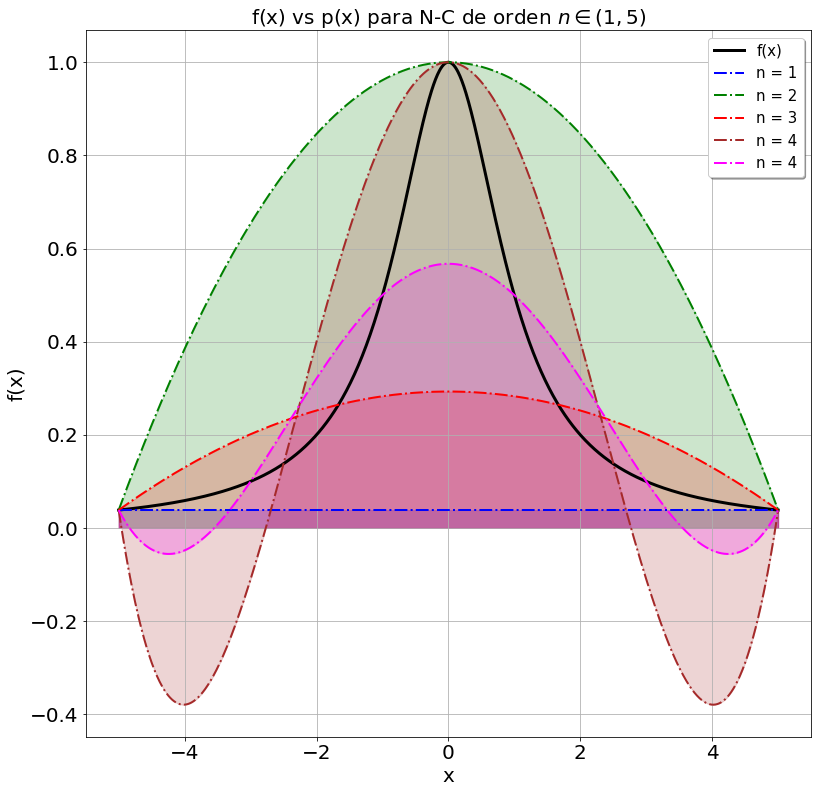

In [6]:
plt.figure(figsize=(13,13))
plt.plot(x,f(x),color='k',lw=3,label='f(x)')
plt.plot(x,p1,color='b',lw=2,ls='-.',label='n = 1')
plt.fill_between(x,p1,color='b',alpha=0.2)
plt.plot(x,p2,color='g',lw=2,ls='-.',label='n = 2')
plt.fill_between(x,p2,color='g',alpha=0.2)
plt.plot(x,p3,color='r',lw=2,ls='-.',label='n = 3')
plt.fill_between(x,p3,color='r',alpha=0.2)
plt.plot(x,p4,color='brown',lw=2,ls='-.',label='n = 4')
plt.fill_between(x,p4,color='brown',alpha=0.2)
plt.plot(x,p5,color='magenta',lw=2,ls='-.',label='n = 4')
plt.fill_between(x,p5,color='magenta',alpha=0.2)
#plt.scatter(X,Y,marker='^',lw=10,color='r')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.title('f(x) vs p(x) para N-C de orden $n \in (1,5)$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

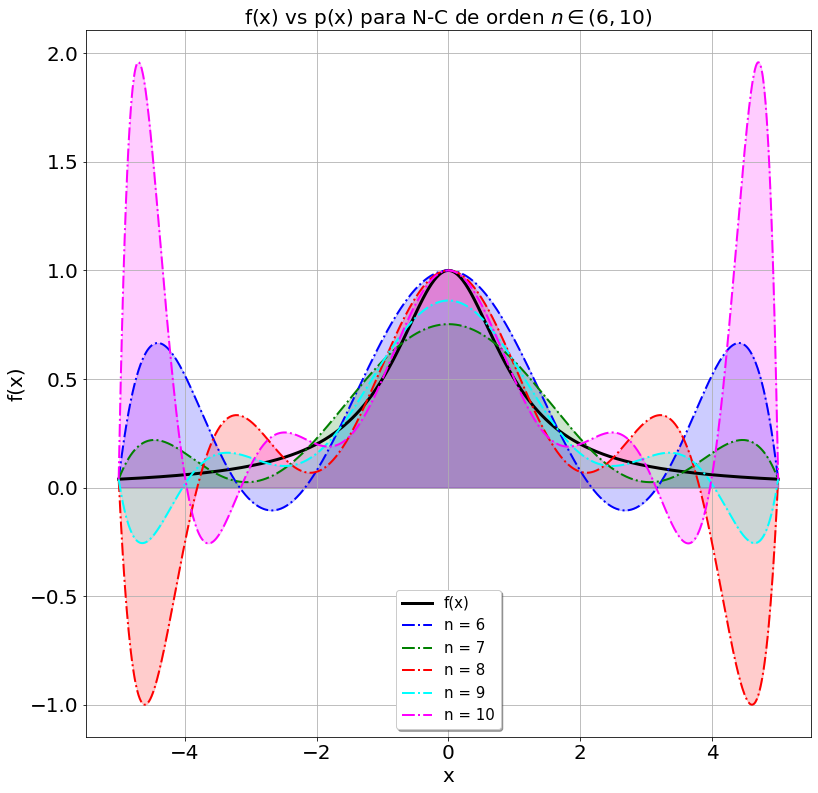

In [7]:
plt.figure(figsize=(13,13))
plt.plot(x,f(x),color='k',lw=3,label='f(x)')
plt.plot(x,p6,color='b',lw=2,ls='-.',label='n = 6')
plt.fill_between(x,p6,color='b',alpha=0.2)
plt.plot(x,p7,color='g',lw=2,ls='-.',label='n = 7')
plt.fill_between(x,p7,color='g',alpha=0.2)
plt.plot(x,p8,color='r',lw=2,ls='-.',label='n = 8')
plt.fill_between(x,p8,color='r',alpha=0.2)
plt.plot(x,p9,color='cyan',lw=2,ls='-.',label='n = 9')
plt.fill_between(x,p9,color='cyan',alpha=0.2)
plt.plot(x,p10,color='magenta',lw=2,ls='-.',label='n = 10')
plt.fill_between(x,p10,color='magenta',alpha=0.2)
#plt.scatter(X,Y,marker='^',lw=10,color='r')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.title('f(x) vs p(x) para N-C de orden $n \in (6,10)$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

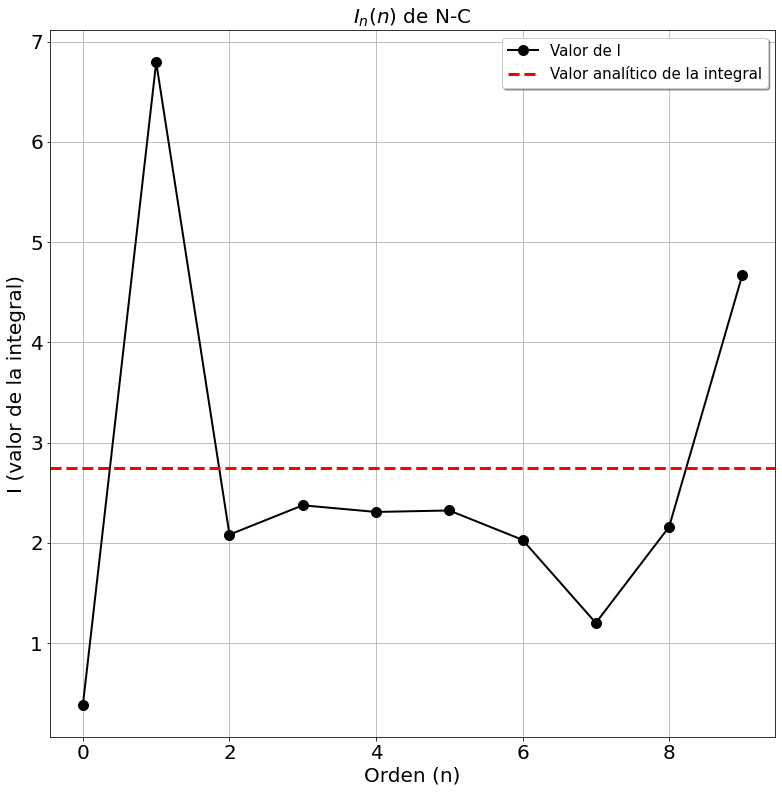

In [8]:
#Valor vs orden:

plt.figure(figsize=(13,13))
plt.plot([i for i in range(len(I_T))],I_T,color='k',lw=2,label='Valor de I',marker='o',markersize=10)
plt.axhline(2*np.arctan(5),label='Valor analítico de la integral',lw=3,color='r',ls='--')
#plt.scatter(X,Y,marker='^',lw=10,color='r')
plt.grid(True)
plt.xlabel('Orden (n)',size=20)
plt.ylabel('I (valor de la integral)',size=20)
plt.title('$I_n (n)$ de N-C',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

**Conclusión:** <br>
Vemos cómo a mayor orden $(n > 6)$ los valores de $I$ comienzan a ser cada vez peores. Suponemos que esto es debido a los *wiggles* que ocurren cuando utilizamos polinomios interpolatorios de órdenes elevados.

## 25)
Podemos ver que cada término $R_{k,1}$ agrega $2^{k-2}$ puntos interiores para usar en la Regla del Trapecio *(N-C de orden 1)* a la aproximación $R_{k-1,1}$, describiendo entonces cada vez mejor aproximadores de $I$, que si bien convergen de manera lenta, los podemos escribir como una recurrencia. Veamos cómo: <br>
Definiendo $h_k = \frac{b-a}{2^{k-1}}$, sabemos <br>
<center> $R_{k,1} = [f(a)+f(b)+2\sum_{i=1}^{2^{k-1}-1}f(a+ih_k)]\frac{h_k}{2}$ </center> <br>

Como siempre dividiremos al dominio en una cantidad **par** de trapecios (usando una cantidad **impar** de puntos de interpolación), separamos la sumatoria en términos pares e impares. Abusando de la notación, al definir $i = 2 \cdot j$ (para la sumatoria par), y reconociendo el hecho de que $h_{k-1} = 2 \cdot h_k$ (porque son divisiones sucesivas por 2), podemos hacer un *rearrange* de términos (todos sumandos) tal que <br>
<center> $R_{k,1} = [R_{k-1,1} + h_{k-1} \sum_{j=1}^{2^{k-2}}f(a+(2j-1)h_k)]\frac{1}{2}$ </center> <br>